# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **Importing Train and Test Dataset**

In [ ]:

dataframe_train = pd.read_csv('train.csv')

dataframe_test = pd.read_csv('test.csv')



# **Data description**

In [ ]:
dataframe_train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.428336e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.797779e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


In [ ]:
dataframe_test.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.217000e+03,2.217000e+03,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000
mean,4.628092e+09,5.387242e+05,3.353631,2.099008,2073.439783,13554.643212,1.496166,0.005864,0.227334,3.412720,7.648173,1791.431213,282.008570,1971.046459,86.330627,98079.107352,47.557274,-122.215217,1985.875056,12147.815065
std,2.910469e+09,3.586351e+05,0.867263,0.757563,897.054209,29606.430361,0.543553,0.076368,0.755074,0.665472,1.150964,836.477490,423.914803,29.505233,405.893265,52.951950,0.136144,0.140791,686.149119,22904.986531
min,1.000102e+06,8.300000e+04,1.000000,0.500000,420.000000,683.000000,1.000000,0.000000,0.000000,1.000000,4.000000,420.000000,0.000000,1900.000000,0.000000,98001.000000,47.194200,-122.511000,399.000000,755.000000
25%,2.117700e+09,3.200000e+05,3.000000,1.500000,1460.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.469800,-122.329000,1490.000000,5078.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1910.000000,7526.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98070.000000,47.567000,-122.235000,1830.000000,7551.000000
75%,7.462900e+09,6.350000e+05,4.000000,2.500000,2490.000000,10464.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,540.000000,1997.000000,0.000000,98118.000000,47.674500,-122.127000,2370.000000,10000.000000
max,9.839301e+09,3.850000e+06,9.000000,6.000000,7850.000000,435600.000000,3.500000,1.000000,4.000000,5.000000,12.000000,7850.000000,2570.000000,2015.000000,2015.000000,98199.000000,47.777500,-121.352000,6210.000000,292645.000000


# **Checking for null values in the data**

In [ ]:
dataframe_train.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

We found that there are no null values

# **Using Correlation matrix  to see the correlation between different variables**


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


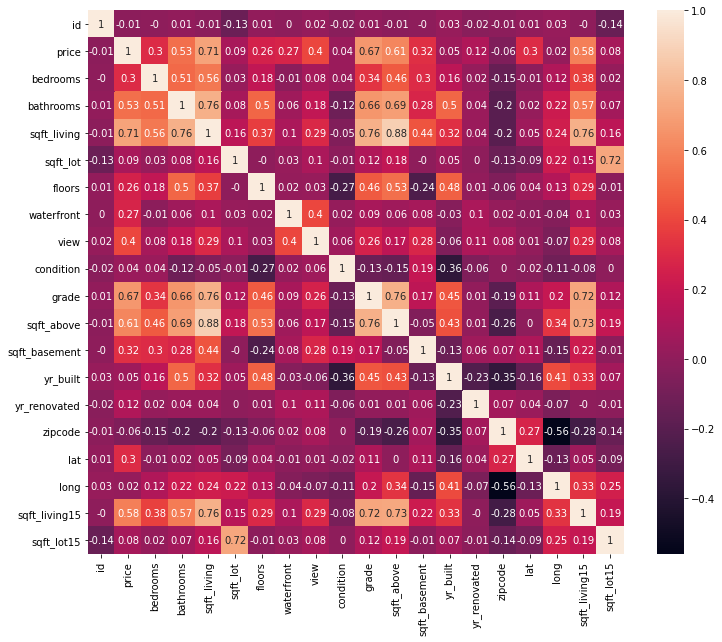

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 10))
correlation_matrix = dataframe_train.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)#  We use annot = True to print the values inside the square

# **ForTraining Data**

In [ ]:
X_train = dataframe_train.iloc[:,[4,5,11,12,19,3,13,9,17,7,8]].values
y_train = dataframe_train.iloc[:, [2]].values #target

# **Fitting Model to our Train dataset**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly_train = poly_reg.fit_transform(X_train)


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_poly_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#**Seeing the prediction value on Training set using R2 Score**

In [ ]:
y_train_pred=lin_reg.predict(X_poly_train)
from sklearn.metrics import r2_score
r2=r2_score(y_train,y_train_pred)
print(r2)

0.8122701272464432


# **Performing Prediction on the Test Dataset**

In [ ]:
#For test data
X_test = dataframe_test.iloc[:,[4,5,11,12,19,3,13,9,17,7,8]].values
y_test = dataframe_test.iloc[:, [2]].values  #target


In [ ]:
X_poly_test = poly_reg.fit_transform(X_test)


In [ ]:
y_test_pred=lin_reg.predict(X_poly_test)
y_test_pred

array([[325708.51479506],
       [511948.51479506],
       [216908.51479506],
       ...,
       [643148.51479506],
       [388012.51479506],
       [516268.51479506]])

##**R2_score**

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_pred)
print(r2)

0.7147232942366573
